# Imports 

In [1]:
import json; import os; import pandas as pd; import spacy; import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

 # Functions
 Vader Setiment\
 Spacy 

In [2]:
sentimentSet = []
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    sentimentSet.append(sentiment_dict)
    
nlp = spacy.load("en_core_web_sm")

# Jason file manipulation



In [3]:
# Counting jason files in directory 
folders = os.listdir("edhrec Slack export Sep 4 2016 - Oct 23 2019"); folderSize = (len(folders)); folderNames = [0]*folderSize
ii = 0

### Ignoring json files in folder (channels.json, integration_ logs.json, users.json)
for count in range(len(folderNames)):

    folderNames[ii] = folders[ii]   
    ii += 1

    if folderNames[ii-1] == "channels.json":
        folderNames[ii-1] = 0

    
    if folderNames[ii-1] == "integration_logs.json":
        folderNames[ii-1] = 0
    
    if folderNames[ii-1] == "users.json":
        folderNames[ii-1] = 0
###

### Removing placed zeros             
try:
    while True:
        folderNames.remove(0)
except ValueError:
    pass 
###



# Jason files to Python dictionaries

In [4]:
fileList = []; folderList = []; folderPath = [0]*len(folderNames); mainPath = []; slackContent = []; all_possible_keys = set(); channelsDict = {'Channel':[]}

jj = 0; ii = 0

### Conversion of json files to python dictionaries and collection of key value pairs
for Paths in folderNames:
    
    mainPath1 = 'C:/Users/solid/Documents/Scripts/Code/'
    mainPath2 = 'MindStand/edhrec Slack export Sep 4 2016 - Oct 23 2019/'
    folderPath[ii] = folderNames[ii]
    folderList.append(os.path.join(mainPath1,mainPath2,folderPath[ii]))
    fileIter = os.listdir(folderList[ii])
    
    for d in range(len(fileIter)):
        fileList.append(fileIter[d])  
        mainPath.append(os.path.join(folderList[ii],fileList[d]))
        mainPath[jj] = mainPath[d].replace('\\','/')
        with open(mainPath[ii], encoding="utf8") as f:
            data = json.load(f)
            slackContent.append(data)
            for d in data:
                channelsDict['Channel'].append(Paths)
                for k in d.keys():
                    all_possible_keys.add(k)

        jj += 1
    ii += 1
###

# Dataframe Creation

In [5]:
### Creation of dataframe based on a key: [list of values] organization
main_data = {}
for stuff in slackContent:
    for p in stuff:
        for field in list(all_possible_keys):
            if field not in main_data:
                main_data[field] = []
            if field in p:
                main_data[field].append(p[field])
            else:
                main_data[field].append(None)
dataframe = pd.DataFrame.from_dict(main_data)
df = dataframe[['text','thread_ts','user']]
channelDataFrame = pd.DataFrame.from_dict(channelsDict)
###

# Spacy application

In [6]:
### Iterating through dataframe and applying spacy
dataSpan = range(0,len(df),1)
test_nlp = [0]*len(dataSpan)
ii = 0
for row in dataSpan:
    test_nlp[ii] = nlp(df.text[row])
    ii += 1 
###

# Creation of Noun, Verb, and Adjective sets

In [7]:
wordDataList = []
ii = 0
for row in test_nlp:
    sentence = [row.text]
    noun = [token.text for token in test_nlp[ii] if token.pos_ == "NOUN"]
    Verb = [token.text for token in test_nlp[ii] if token.pos_ == "VERB"]
    Adj = [token.text for token in test_nlp[ii] if token.pos_ == "ADJ"]
    pt1 = sentence
    pt2 = noun
    pt1_pt2 = sentence,noun
    wordDataList.append([pt1_pt2])
    iterDataFrame = pd.DataFrame(wordDataList[0], columns=['Sentence','Nouns'])
    # wordDataFrame = DataFrames.append(iterDataFrame)
    wordDataFrame = pd.DataFrame().append(iterDataFrame)
    
    ii+=1

# Spacy Application

In [8]:
wordDataList = []
iterDataFrame = [0]*len(test_nlp)
ii = 0
for row in test_nlp:
    Sentence = [row.text]
    Noun = [token.text for token in test_nlp[ii] if token.pos_ == "NOUN"]
    Verb = [token.text for token in test_nlp[ii] if token.pos_ == "VERB"]
    Adj = [token.text for token in test_nlp[ii] if token.pos_ == "ADJ"]
    pt1 = sentence
    pt2 = Noun
    pt3 = Verb
    pt4 = Adj
    pts = Sentence,Noun,Verb,Adj
    wordDataList.append(pts)
    ii+=1

DataFrame = pd.DataFrame(wordDataList,columns=['Sentence','Noun','Verb','Adjective'])
wordDataFrame = DataFrame.join(channelDataFrame).join(dataframe['user'])
wordDataFrame

,Sentence,Noun,Verb,Adjective,Channel,user
0,[<@U3QMCLQQG> has joined the channel],[channel],[joined],[],amateurdesignerhour,U3QMCLQQG
1,[<@U3QMCLQQG> set the channel purpose: Discuss...,"[channel, purpose, study, practice]","[set, prepare]",[],amateurdesignerhour,U3QMCLQQG
2,[],[],[],[],amateurdesignerhour,U3QMCLQQG
3,[<@U3QMCLQQG> pinned their File to this chann...,[channel],[pinned],[],amateurdesignerhour,U3QMCLQQG
4,[<@U3MTAQBE1> has joined the channel],[channel],[joined],[],amateurdesignerhour,U3MTAQBE1
...,...,...,...,...,...,...
305146,[<https://magic.wizards.com/en/articles/archiv...,[https://magic.wizards.com/en/articles/archive...,[],[],youtube-monitor,U3QMCLQQG
305147,[This guy failed the test for GDS2 by one ques...,"[guy, test, question, answers]",[failed],[],youtube-monitor,U3QMCLQQG
305148,[<https://billymoreno2.wordpress.com/2010/10/1...,[],[],[],youtube-monitor,U3QMCLQQG
305149,[<@U3FV90TCZ> has joined the channel],[channel],[joined],[],youtube-monitor,U3FV90TCZ


##### List items as strings

In [9]:
def clean_alt_list(list_):
    list_ = list_.replace(', ', '","')
    list_ = list_.replace('[', '["')
    list_ = list_.replace(']', '"]')
    return list_

In [10]:
WordSentimentDataFrame= wordDataFrame
WordSentimentDataFrame = WordSentimentDataFrame.explode('Sentence')
WordSentimentDataFrame['Sentence'] = WordSentimentDataFrame['Sentence'].str.strip()



In [11]:
WordSentimentDataFrame['Sentence'] = WordSentimentDataFrame.loc[WordSentimentDataFrame['Sentence'].str.contains(r'https')==False]
WordSentimentDataFrame = WordSentimentDataFrame.loc[WordSentimentDataFrame['Sentence'].str.contains(r'@')==False]
WordSentimentDataFrame = WordSentimentDataFrame.loc[WordSentimentDataFrame['Sentence'].str.contains(r'::')==False]
WordSentimentDataFrame = WordSentimentDataFrame.loc[WordSentimentDataFrame['Sentence'].str.contains(r'\\')==False]
WordSentimentDataFrame = WordSentimentDataFrame.loc[WordSentimentDataFrame['Sentence'].str.contains(r'\+')==False]
WordSentimentDataFrame.dropna(inplace=True)
WordSentimentDataFrame['Sentence'].replace('',np.nan,inplace=True)
WordSentimentDataFrame.dropna(subset=['Sentence'],inplace=True)
print(len(wordDataFrame))
print(len(WordSentimentDataFrame))
WordSentimentDataFrame.drop_duplicates(subset=["Sentence"],inplace=True)
WordSentimentDataFrame

305151
270844


,Sentence,Noun,Verb,Adjective,Channel,user
6,"Drive to Work #12, #436 and #437 all cover GDS...",[],"[Drive, Work, cover]",[],amateurdesignerhour,U3QMCLQQG
9,Here's one of the articles,[articles],[],[],amateurdesignerhour,U3QMCLQQG
11,This guy failed the test for GDS2 by one quest...,"[guy, test, question, answers]",[failed],[],amateurdesignerhour,U3QMCLQQG
585,Do you have any ideas for themes your stuff wi...,"[ideas, themes, stuff]","[have, explore]",[],aprilfools,U3QMCLQQG
586,I'm very curious about exploring where colors ...,"[colors, talks, color, wheel, time, colors, co...","['m, exploring, go, changing, change, remain, ...","[curious, mechanical, future]",aprilfools,U3L7A68JC
...,...,...,...,...,...,...
233305,I guess it could just be solved by removing al...,"[counters, creatures, memory, issues]","[guess, solved, removing, leaves, eliminates]",[],shittalk,U3FV90TCZ
233306,[Insert 1/1 counter text]\n\nCreatures are 0/0...,"[counter, text, Creatures, leaves, counters, c...",[remove],[],shittalk,U3FV90TCZ
233307,Gives it some added tension/ risk-reward with ...,"[risk, reward, P, T, self, plague, wind]","[Gives, added, doubles, remove]",[],shittalk,U3FV90TCZ
233308,"Do you really think there are memory issues, t...","[memory, issues, version, fun, minigame, encha...","[think, made, figured, be, try, remove, double]","[legendary, entire]",shittalk,UEF135G05


In [12]:
WordSentimentDataFrame.Verb=WordSentimentDataFrame.Verb.apply(lambda y: np.nan if len(y)==0 else y)
WordSentimentDataFrame.Adjective=WordSentimentDataFrame.Adjective.apply(lambda y: np.nan if len(y)==0 else y)
WordSentimentDataFrame.Noun=WordSentimentDataFrame.Noun.apply(lambda y: np.nan if len(y)==0 else y)



In [13]:
WordSentimentDataFrame

,Sentence,Noun,Verb,Adjective,Channel,user
6,"Drive to Work #12, #436 and #437 all cover GDS...",NaN,"[Drive, Work, cover]",NaN,amateurdesignerhour,U3QMCLQQG
9,Here's one of the articles,[articles],NaN,NaN,amateurdesignerhour,U3QMCLQQG
11,This guy failed the test for GDS2 by one quest...,"[guy, test, question, answers]",[failed],NaN,amateurdesignerhour,U3QMCLQQG
585,Do you have any ideas for themes your stuff wi...,"[ideas, themes, stuff]","[have, explore]",NaN,aprilfools,U3QMCLQQG
586,I'm very curious about exploring where colors ...,"[colors, talks, color, wheel, time, colors, co...","['m, exploring, go, changing, change, remain, ...","[curious, mechanical, future]",aprilfools,U3L7A68JC
...,...,...,...,...,...,...
233305,I guess it could just be solved by removing al...,"[counters, creatures, memory, issues]","[guess, solved, removing, leaves, eliminates]",NaN,shittalk,U3FV90TCZ
233306,[Insert 1/1 counter text]\n\nCreatures are 0/0...,"[counter, text, Creatures, leaves, counters, c...",[remove],NaN,shittalk,U3FV90TCZ
233307,Gives it some added tension/ risk-reward with ...,"[risk, reward, P, T, self, plague, wind]","[Gives, added, doubles, remove]",NaN,shittalk,U3FV90TCZ
233308,"Do you really think there are memory issues, t...","[memory, issues, version, fun, minigame, encha...","[think, made, figured, be, try, remove, double]","[legendary, entire]",shittalk,UEF135G05


In [14]:
analyzer = SentimentIntensityAnalyzer()
WordSentimentDataFrame['compound'] = [analyzer.polarity_scores(x)['compound'] for x in WordSentimentDataFrame["Sentence"]]
WordSentimentDataFrame['neg'] = [analyzer.polarity_scores(x)['neg'] for x in WordSentimentDataFrame["Sentence"]]
WordSentimentDataFrame['neu'] = [analyzer.polarity_scores(x)['neu'] for x in WordSentimentDataFrame["Sentence"]]
WordSentimentDataFrame['pos'] = [analyzer.polarity_scores(x)['pos'] for x in WordSentimentDataFrame["Sentence"]]

In [15]:
WordSentimentDataFrame

,Sentence,Noun,Verb,Adjective,Channel,user,compound,neg,neu,pos
6,"Drive to Work #12, #436 and #437 all cover GDS...",NaN,"[Drive, Work, cover]",NaN,amateurdesignerhour,U3QMCLQQG,0.0000,0.000,1.000,0.000
9,Here's one of the articles,[articles],NaN,NaN,amateurdesignerhour,U3QMCLQQG,0.0000,0.000,1.000,0.000
11,This guy failed the test for GDS2 by one quest...,"[guy, test, question, answers]",[failed],NaN,amateurdesignerhour,U3QMCLQQG,-0.5106,0.202,0.798,0.000
585,Do you have any ideas for themes your stuff wi...,"[ideas, themes, stuff]","[have, explore]",NaN,aprilfools,U3QMCLQQG,0.0000,0.000,1.000,0.000
586,I'm very curious about exploring where colors ...,"[colors, talks, color, wheel, time, colors, co...","['m, exploring, go, changing, change, remain, ...","[curious, mechanical, future]",aprilfools,U3L7A68JC,0.7092,0.000,0.890,0.110
...,...,...,...,...,...,...,...,...,...,...
233305,I guess it could just be solved by removing al...,"[counters, creatures, memory, issues]","[guess, solved, removing, leaves, eliminates]",NaN,shittalk,U3FV90TCZ,0.2732,0.000,0.913,0.087
233306,[Insert 1/1 counter text]\n\nCreatures are 0/0...,"[counter, text, Creatures, leaves, counters, c...",[remove],NaN,shittalk,U3FV90TCZ,0.0000,0.000,1.000,0.000
233307,Gives it some added tension/ risk-reward with ...,"[risk, reward, P, T, self, plague, wind]","[Gives, added, doubles, remove]",NaN,shittalk,U3FV90TCZ,-0.1655,0.073,0.927,0.000
233308,"Do you really think there are memory issues, t...","[memory, issues, version, fun, minigame, encha...","[think, made, figured, be, try, remove, double]","[legendary, entire]",shittalk,UEF135G05,0.5106,0.000,0.916,0.084


<AxesSubplot:xlabel='Noun'>

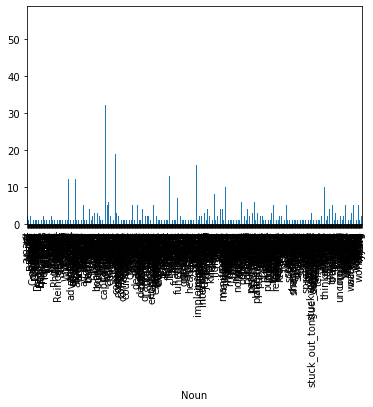

In [19]:
WordSentimentDataFrame.explode('Noun').groupby('Noun').size().plot(kind='bar')